In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsforecast import StatsForecast

# Carrengar o dataframe

In [2]:
df = pd.read_csv("fortaleza.csv", index_col="SE")
df.head(3)

,ds,y,unique_id
SE,,,
202452,2024-12-22,42,1
202451,2024-12-15,65,1
202450,2024-12-08,82,1


# Carregar o modelo

In [3]:
model = StatsForecast.load(path="modelo")
model

StatsForecast(models=[AutoARIMA])

# Selecionar dados de teste

In [ ]:
df["ds"] = pd.to_datetime(df["ds"])
y_test = df[ df["ds"].dt.year == 2024 ]
y_test.head(3)

,ds,y,unique_id
SE,,,
202452,2024-12-22,42,1
202451,2024-12-15,65,1
202450,2024-12-08,82,1


# Fazer a predição

In [5]:
predict = model.predict(h=52)

In [6]:
predict.head(3)

,unique_id,ds,AutoARIMA
0,1,2024-12-29,66.585808
1,1,2025-01-05,91.832939
2,1,2025-01-12,122.456970


# Gráficos

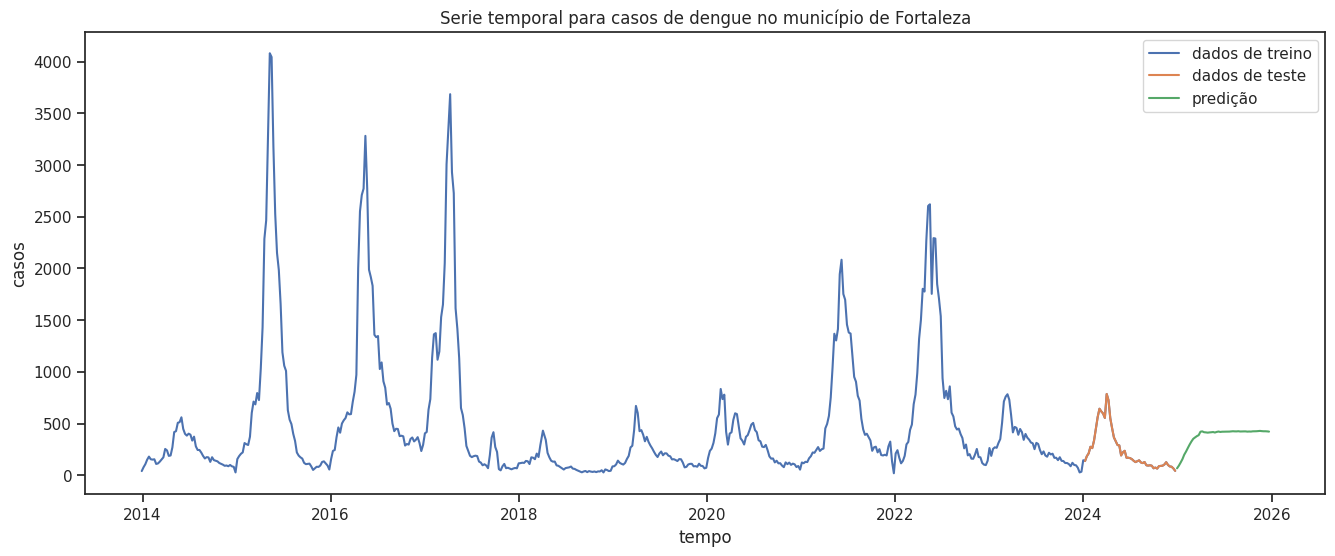

In [15]:
plt.figure("Série temporal completa", figsize=(16,6))
sns.set_theme(style="ticks")

sns.lineplot(data=df, x="ds", y="y", label="dados de treino")
sns.lineplot(data=y_test, x="ds", y="y", label="dados de teste")
sns.lineplot(data=predict, x="ds", y="AutoARIMA", label="predição")

plt.title("Serie temporal para casos de dengue no município de Fortaleza")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

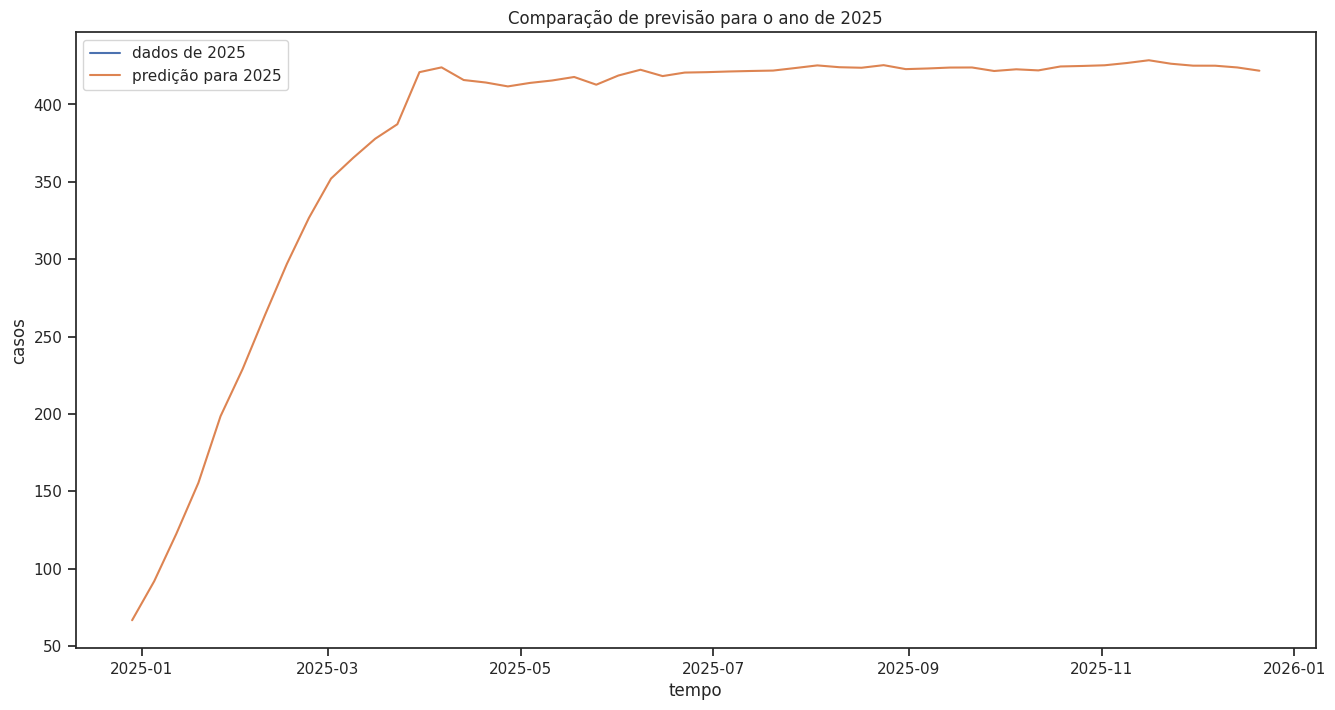

In [25]:
df_cortado = pd.read_csv("fortaleza.csv", index_col="SE")
df_cortado["ds"] = pd.to_datetime(df_cortado["ds"])
df_cortado = df[ df["ds"].dt.year == 2025 ]

plt.figure("Comparação", figsize=[16,8])

sns.lineplot(data=df_cortado, x="ds", y="y", label="dados de 2025")
sns.lineplot(data=predict, x="ds", y="AutoARIMA", label="predição para 2025")

plt.title("Comparação de previsão para o ano de 2025")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

In [24]:
df_cortado

,ds,y,unique_id
SE,,,
202520,2025-05-11,16,1
202519,2025-05-04,70,1
202518,2025-04-27,109,1
202517,2025-04-20,122,1
202516,2025-04-13,114,1
...,...,...,...
201405,2014-01-26,180,1
201404,2014-01-19,150,1
201403,2014-01-12,107,1
